## Network graph visualization

In [1]:
# Import Libraries 
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis 

In [2]:
# import relationship data
relationship_df = pd.read_csv('countries_relationship.csv', index_col = 0)

In [3]:
relationship_df

,source,target,value
0,France,Russia,23
1,Germany,Russia,26
2,Germany,Italy,12
3,Austria,Germany,11
4,Germany,Spain,1
...,...,...,...
95,Greece,Italy,3
96,Italy,Japan,6
97,India,Pakistan,9
98,India,Lebanon,2


In [4]:
# Create a graph from a pandas dataframe

G = nx. from_pandas_edgelist(relationship_df,
                             source= 'source',
                             target= 'target',
                             edge_attr= 'value',
                             create_using= nx.Graph())

## Graph visualization with networkx

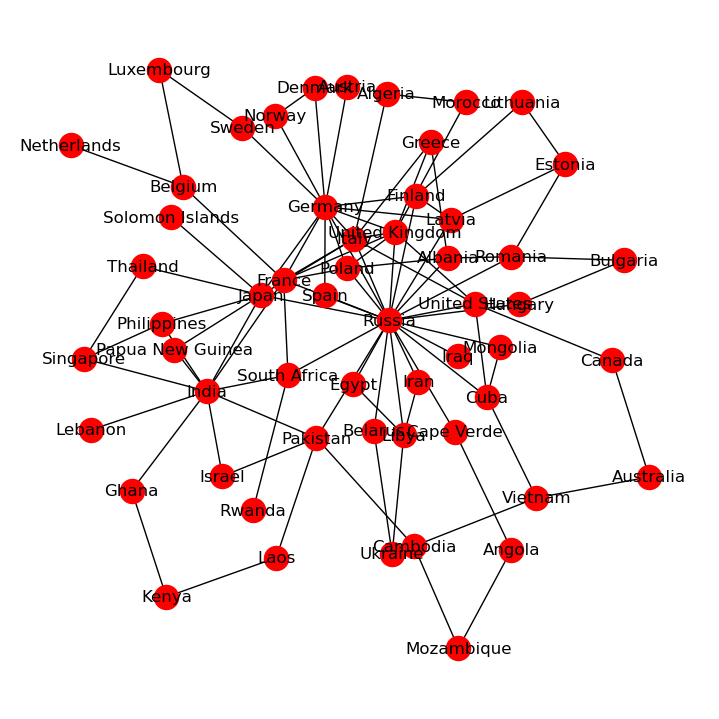

In [5]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [6]:
h.savefig('networkx_plt_century.png')

## Graph Visualization with Pyvis

In [7]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Communities Detection applying leiden algorithm

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [10]:
new_com = coms.to_node_community_map()

In [11]:
new_com

defaultdict(list,
            {'Japan': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Philippines': [0],
             'Solomon Islands': [0],
             'India': [0],
             'Israel': [0],
             'Pakistan': [0],
             'Papua New Guinea': [0],
             'Ghana': [0],
             'Kenya': [0],
             'Laos': [0],
             'Lebanon': [0],
             'Russia': [1],
             'Belarus': [1],
             'Ukraine': [1],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'Iran': [1],
             'Romania': [1],
             'Hungary': [1],
             'Bulgaria': [1],
             'Mongolia': [1],
             'Cuba': [1],
             'Germany': [2],
             'Austria': [2],
             'Spain': [2],
             'Latvia': [2],
             'Estonia': [2],
             'Lithuania': [2],
             'Finland': [2],
             'Denmark': [2],
             'Norway': [2

In [12]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k,v in new_com.items()}

In [13]:
dict_com

{'Japan': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Philippines': 0,
 'Solomon Islands': 0,
 'India': 0,
 'Israel': 0,
 'Pakistan': 0,
 'Papua New Guinea': 0,
 'Ghana': 0,
 'Kenya': 0,
 'Laos': 0,
 'Lebanon': 0,
 'Russia': 1,
 'Belarus': 1,
 'Ukraine': 1,
 'Libya': 1,
 'Egypt': 1,
 'Iraq': 1,
 'Iran': 1,
 'Romania': 1,
 'Hungary': 1,
 'Bulgaria': 1,
 'Mongolia': 1,
 'Cuba': 1,
 'Germany': 2,
 'Austria': 2,
 'Spain': 2,
 'Latvia': 2,
 'Estonia': 2,
 'Lithuania': 2,
 'Finland': 2,
 'Denmark': 2,
 'Norway': 2,
 'France': 3,
 'Italy': 3,
 'Poland': 3,
 'United Kingdom': 3,
 'Greece': 3,
 'Albania': 3,
 'Morocco': 3,
 'Algeria': 3,
 'United States': 3,
 'Cambodia': 4,
 'Mozambique': 4,
 'Angola': 4,
 'Cape Verde': 4,
 'Canada': 4,
 'Australia': 4,
 'Vietnam': 4,
 'Sweden': 5,
 'Luxembourg': 5,
 'Belgium': 5,
 'Netherlands': 5,
 'South Africa': 6,
 'Rwanda': 6}

In [14]:
# Rerun network graph with the communities as an argument


nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_Century_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


## Community Detection Observations
- Russia / Soviet Union:  
  During the 20th century, the Soviet Union played a central role in global politics, from the Russian Revolution and World War II to the Cold War. Its influence extended to Eastern Europe, Asia, Africa, and Latin America, which is reflected in its dense set of connections.

- Western bloc cluster:  
  Countries like the United States, United Kingdom, Germany, France, and their allies appear in another community. This matches the reality of the Cold War, where NATO countries formed a counterbalance to the Soviet bloc.

- Colonial and post-colonial ties:  
  African and Asian countries are grouped into separate clusters, with connections to their former colonial powers (UK, France, etc.). This reflects historical colonial legacies and the post-colonial relationships that shaped the mid-20th century.

 Conclusion
The partition makes sense historically. The graph highlights how Russia (the Soviet Union) acted as a central hub. Overall, the communities reflect both ideological divisions (Cold War blocs) and historical legacies (colonialism, regional alliances).


## Centrality Measures

In [15]:
# Degree Centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.14545454545454545,
 'Russia': 0.41818181818181815,
 'Germany': 0.23636363636363636,
 'Italy': 0.14545454545454545,
 'Austria': 0.01818181818181818,
 'Spain': 0.03636363636363636,
 'Poland': 0.09090909090909091,
 'United Kingdom': 0.14545454545454545,
 'Latvia': 0.07272727272727272,
 'Estonia': 0.05454545454545454,
 'Lithuania': 0.03636363636363636,
 'Finland': 0.07272727272727272,
 'Denmark': 0.03636363636363636,
 'Norway': 0.03636363636363636,
 'Sweden': 0.03636363636363636,
 'Luxembourg': 0.03636363636363636,
 'Belgium': 0.05454545454545454,
 'Netherlands': 0.01818181818181818,
 'Greece': 0.05454545454545454,
 'Albania': 0.07272727272727272,
 'Belarus': 0.03636363636363636,
 'Ukraine': 0.03636363636363636,
 'Libya': 0.07272727272727272,
 'Egypt': 0.03636363636363636,
 'Iraq': 0.01818181818181818,
 'Japan': 0.14545454545454545,
 'Morocco': 0.03636363636363636,
 'Algeria': 0.03636363636363636,
 'United States': 0.09090909090909091,
 'Thailand': 0.03636363636363636,
 'Singa

In [16]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [17]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

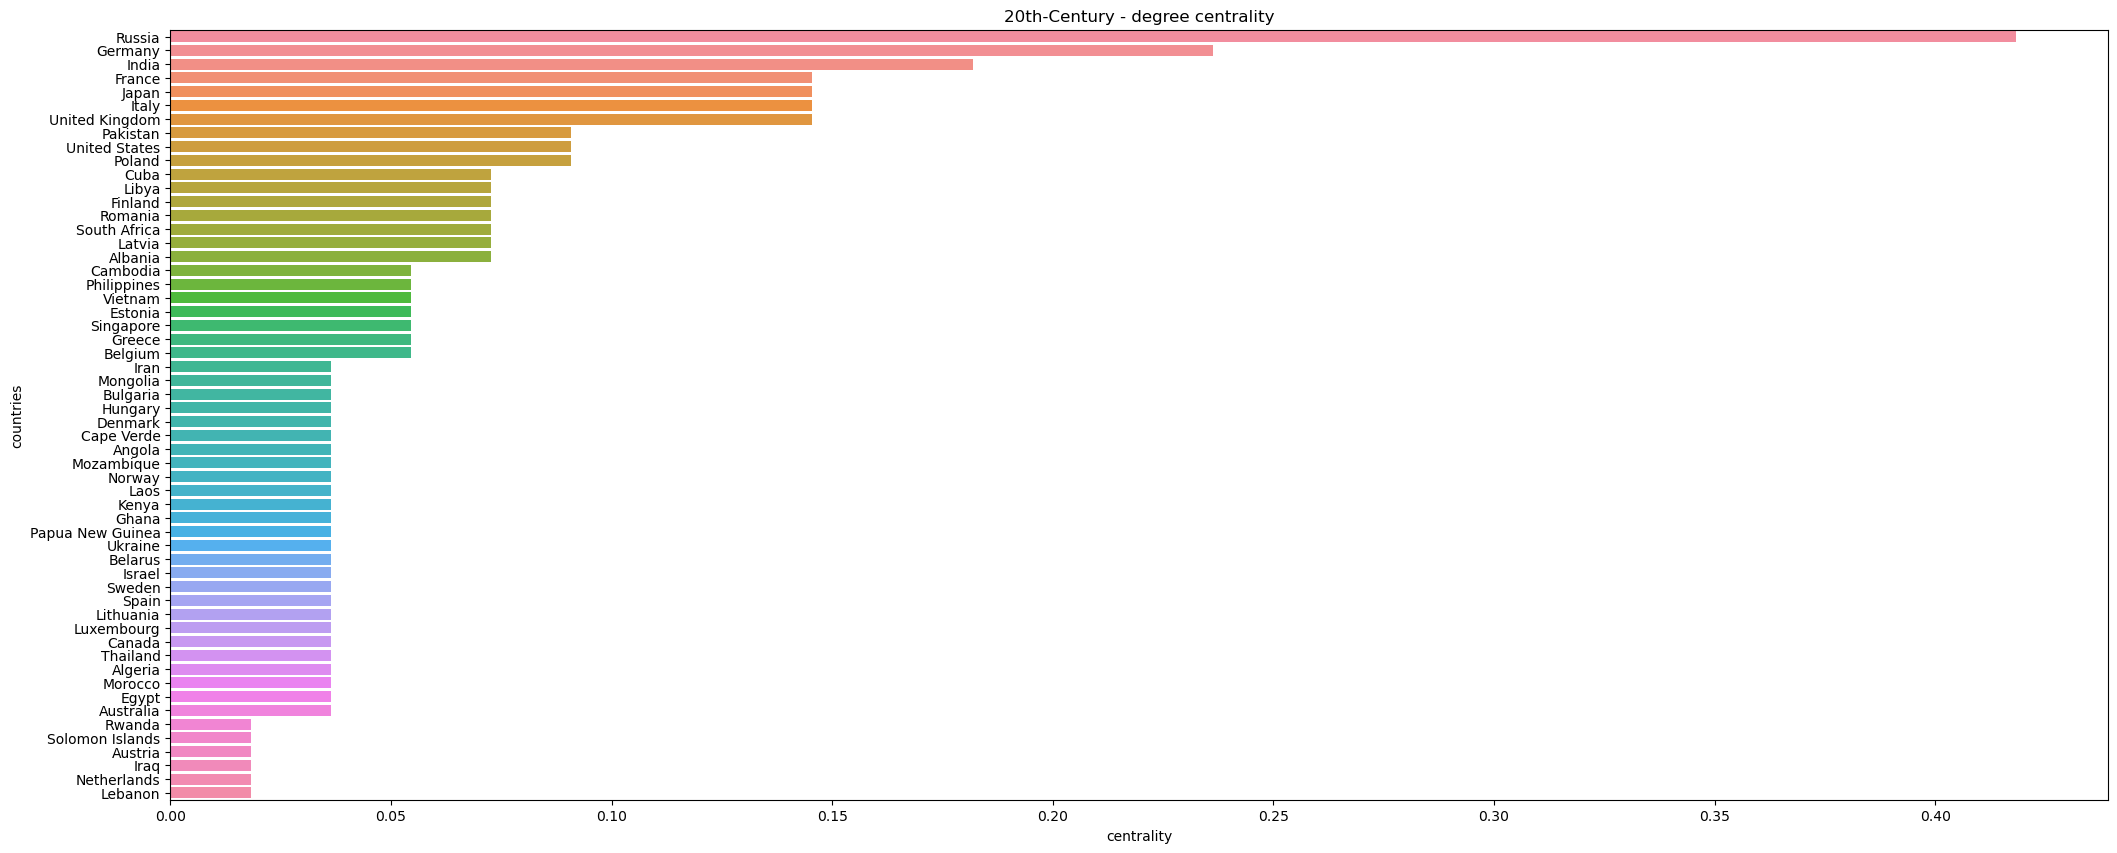

In [22]:
# Plot the degree centrality

plt.figure(figsize = (25, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th-Century - degree centrality")

In [23]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [24]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

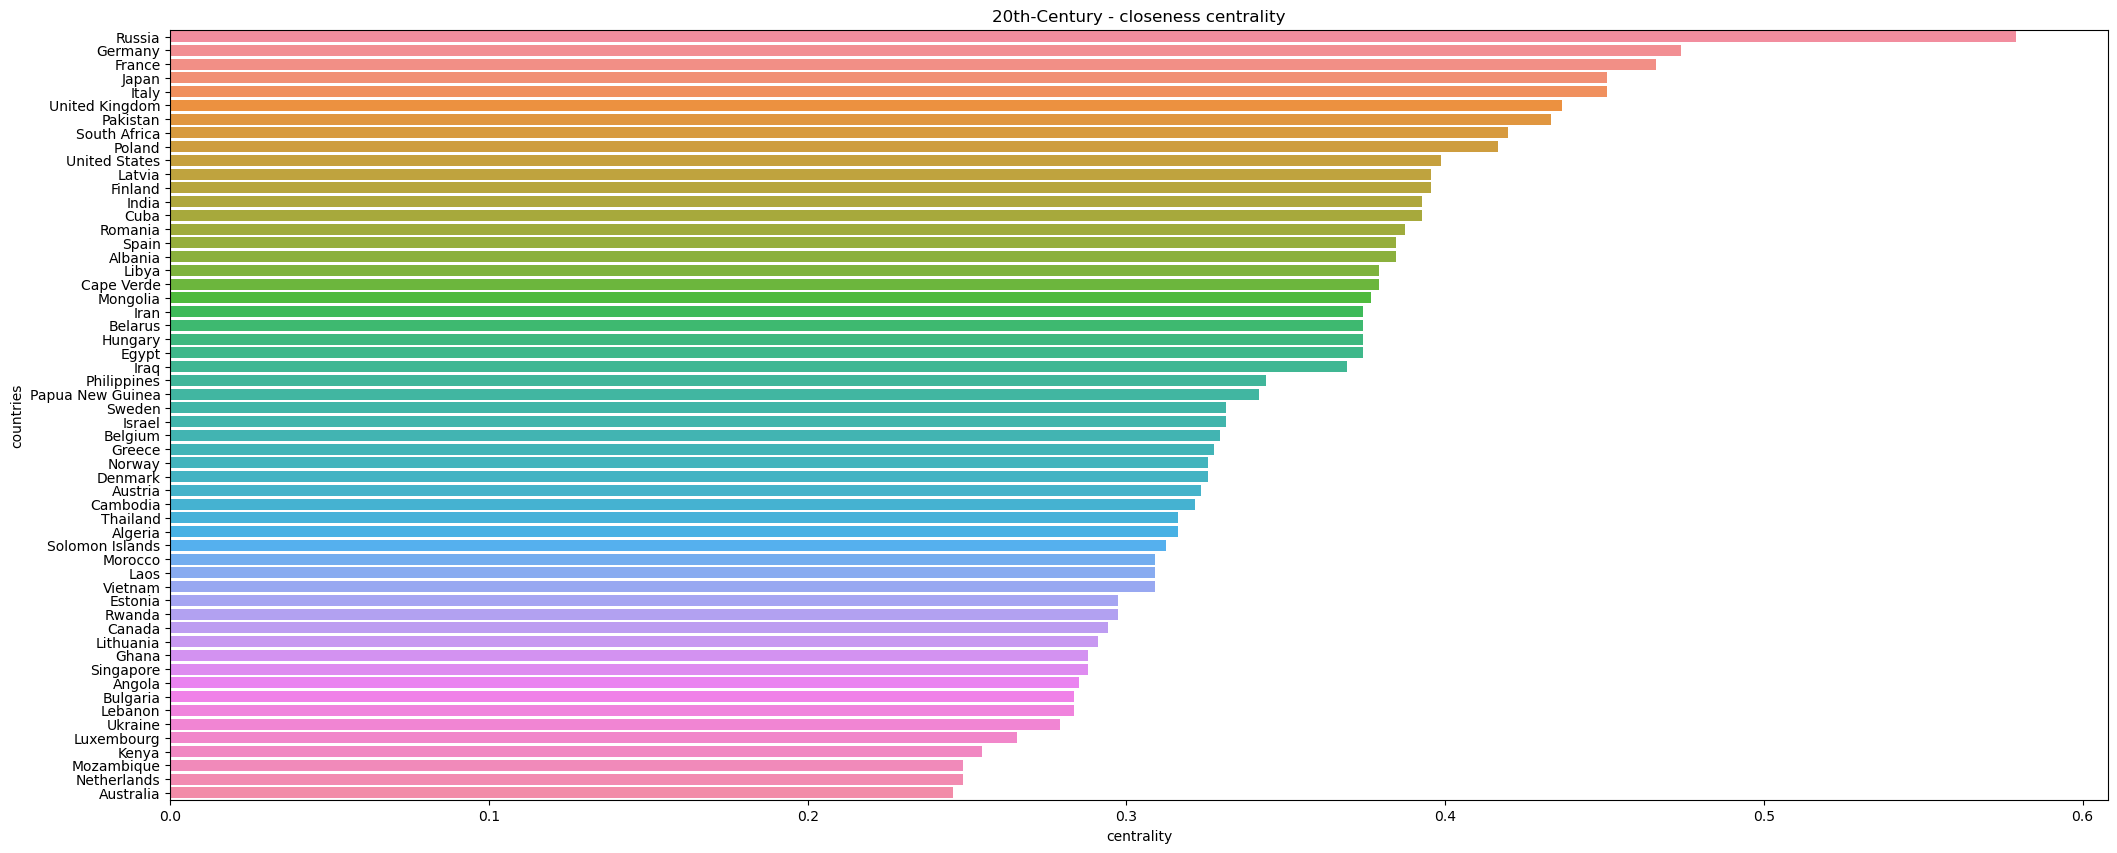

In [25]:
plt.figure(figsize = (25, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th-Century - closeness centrality")

In [26]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [27]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

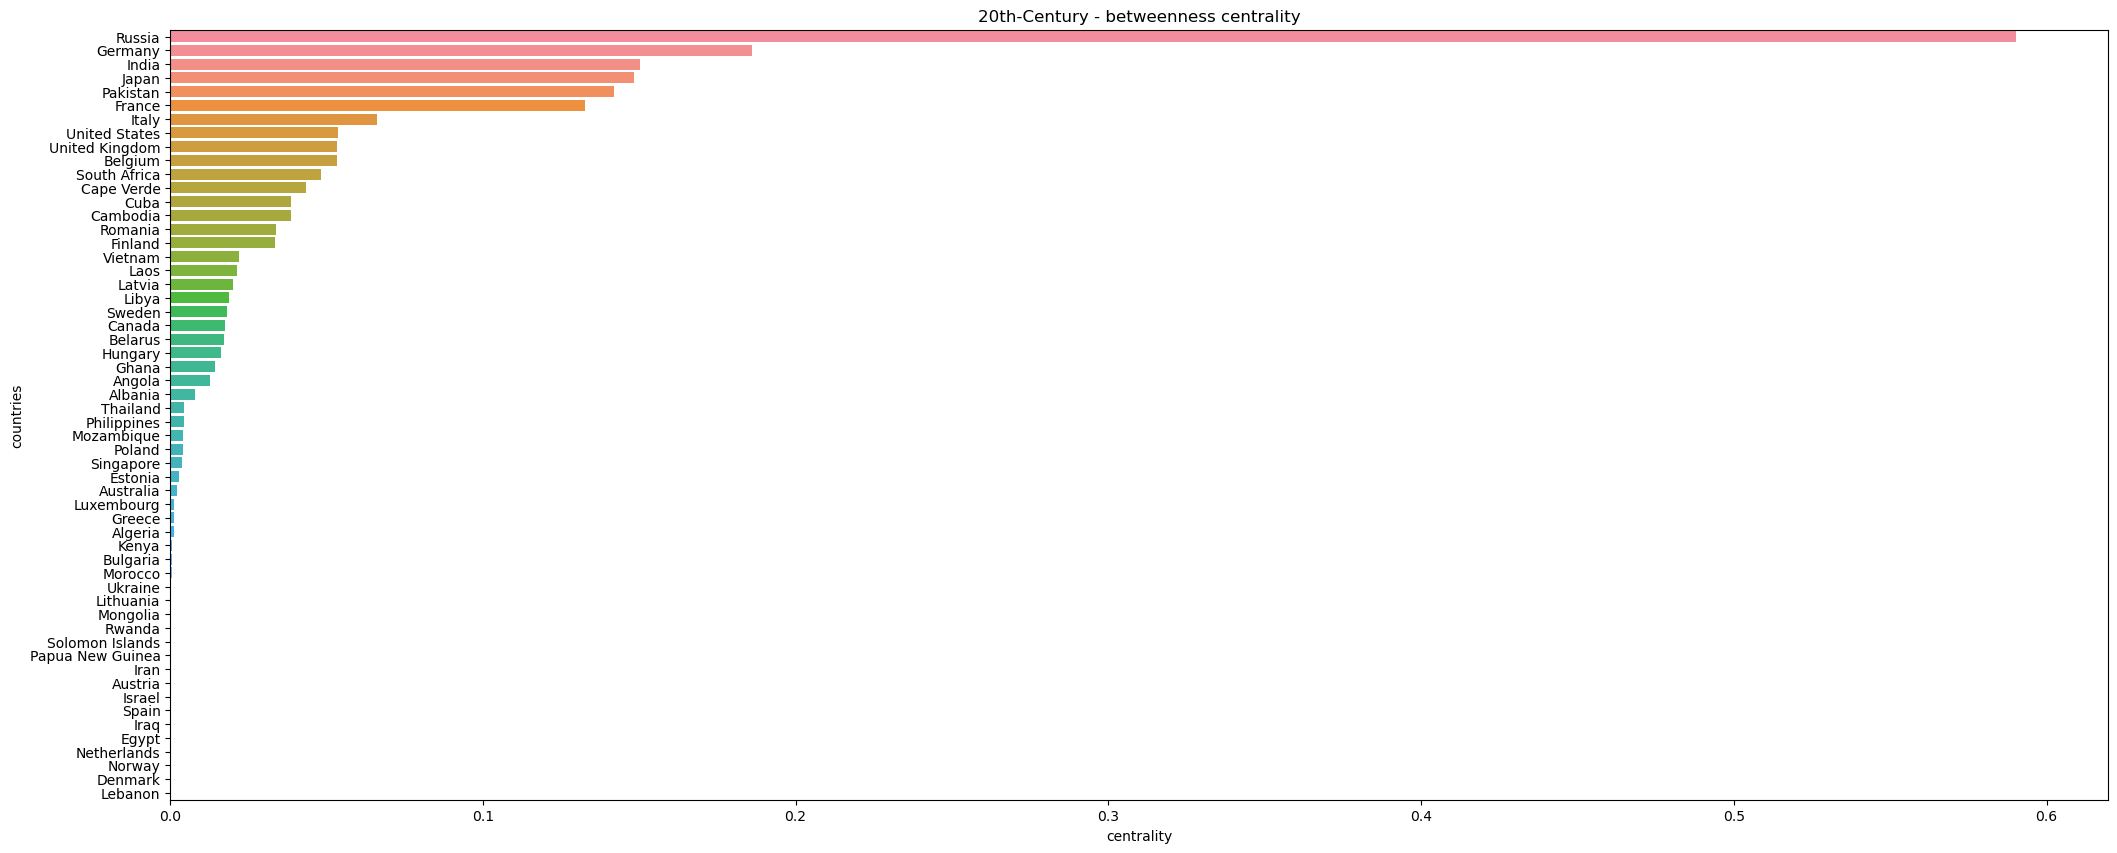

In [29]:
plt.figure(figsize = (25, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th-Century - betweenness centrality")

- Degree Centrality:
  Russia dominate the chart, which aligns with its vast diplomatic, military, and ideological reach during the 20th century.
  Germany follow closely and played a majo role in global alliances, wars, and trade
  
- Closeness centrality 
A country with high closeness centrality can reach all other countries in the network.
Top Ranked countires: Russia, Germany and France are likely central hubs, they are well positioned to rech others.

- Betweenness Centrality
A country with high betweenness acts as a bridge or broker between others.
Russi leads with the highest betweenness as the Soviet Union, it was deeply involved in global conflicts. Connected Eastern Europe, parts of Asia, and even influenced Africa and Latin America.

In [30]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')